In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
t=np.arange(0,50,.1)
np.seterr(divide='ignore')
np.seterr(invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Create Template

$$f_{GW}(t) = B x^{−5/8} (t_c − t)^{−3/8} ,B = 16.6 s−5/8$$

In [2]:
def f(x,tc,t):
    B=16.6
    resul=np.nan_to_num(B*(x**(-5/8))*((tc-t)**(-3/8)))
    resul[abs(resul)>10**(4)]=0
    return resul
    

$$\phi(t) = 2πBx^{-5/8}(-\frac{3}{8})(t_c − t)^{5/8}$$

In [3]:
def phi(x,tc,t):
    B=16.6
    resul=np.nan_to_num(2*np.pi*B*(x**(-5/8))*(-3/8)*((tc-t)**(5/8))) 
    resul[abs(resul)>10**(4)]=0
    return resul

Plot f for chirp Mass in range (10,50) \
Plot f for different $t_c$

10


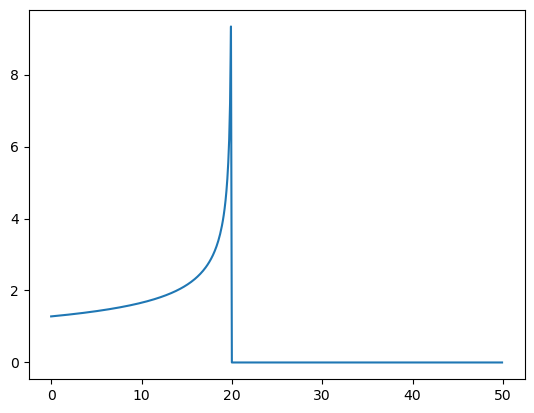

20


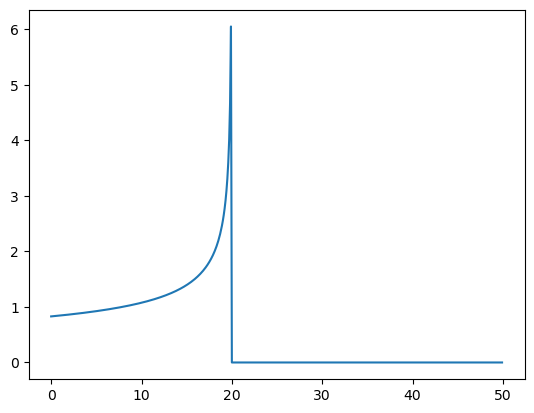

25


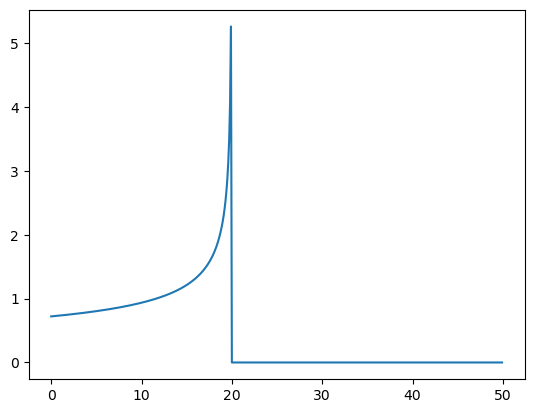

30


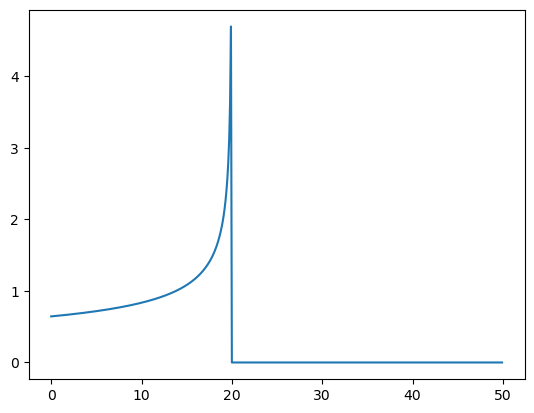

35


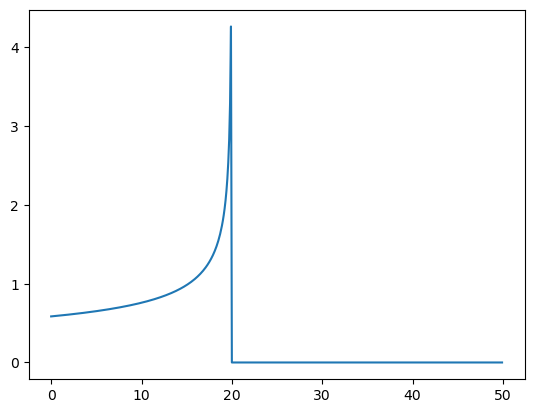

40


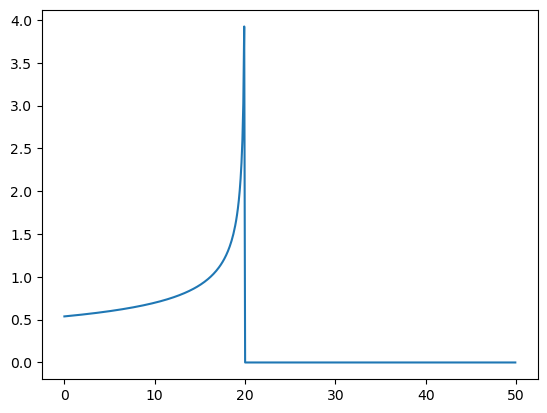

50


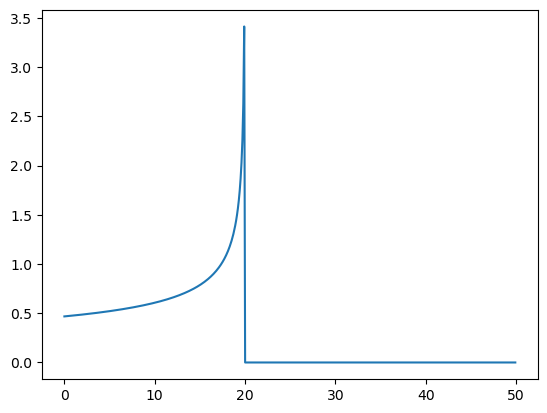

In [4]:
for x in [10,20,25,30,35,40,50]:
    tc=20
    print(x)
    plt.plot(t,f(x,tc,t))
    plt.show()

1


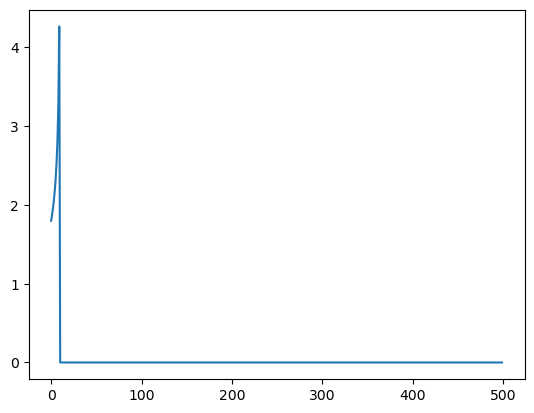

4


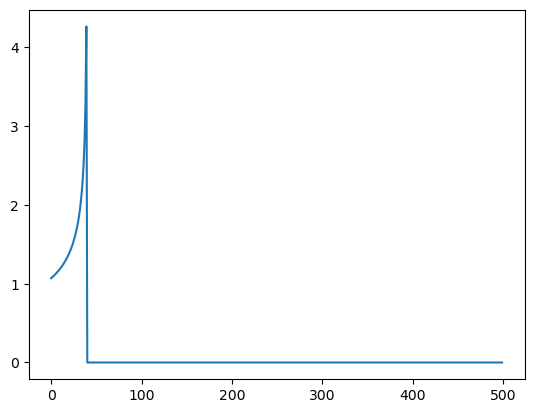

10


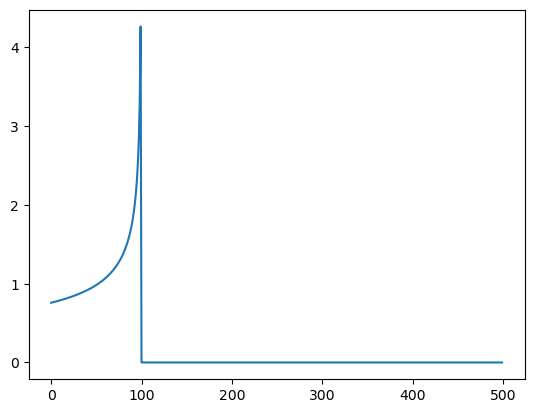

30


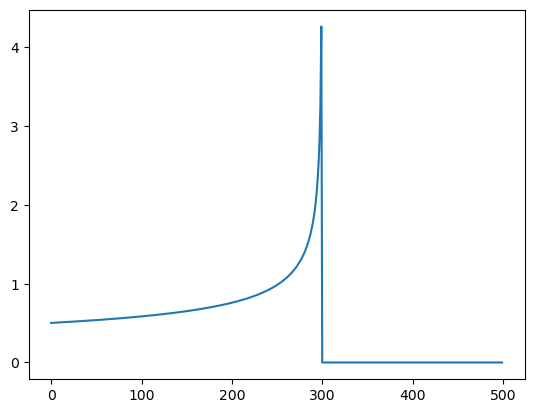

40


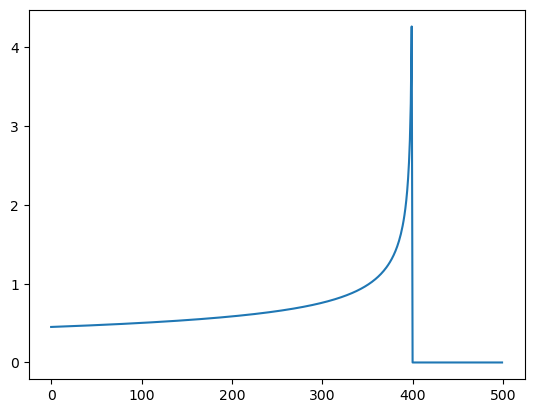

50


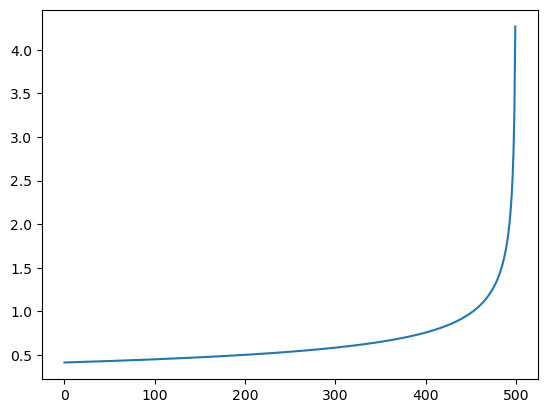

60


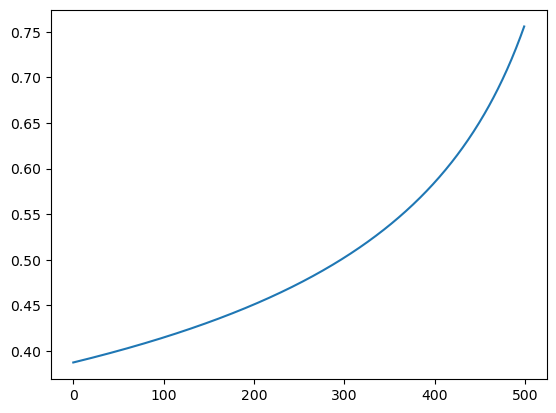

100


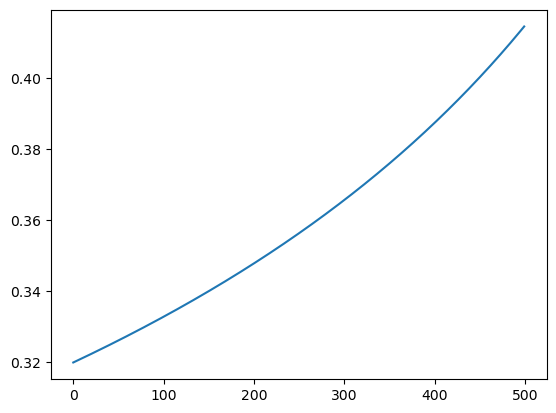

10000


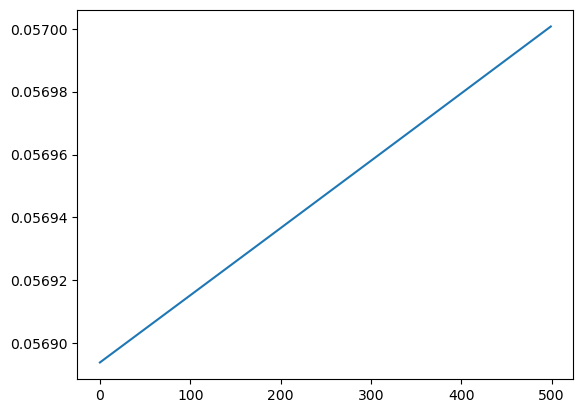

In [5]:
for tc in [1,4,10,30,40,50,60,100,10000]:
    x=35
    print(tc)
    plt.plot(f(x,tc,t))
    plt.show()

$$h(t)=[f(t)]^{2/3}cos[\phi(t)+\phi_c]$$

In [6]:
def strain(x,tc,phi_c):
    return (f(x,tc,t))**(2/3)*np.cos(phi(x,tc,t)+phi_c)
    

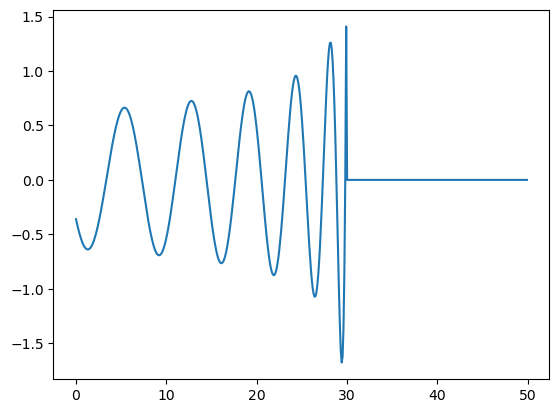

In [7]:
x=35
tc=30
phi_c=0
plt.plot(t,strain(x,tc,phi_c))


Plot for different values of $\phi_c$

[0.0]


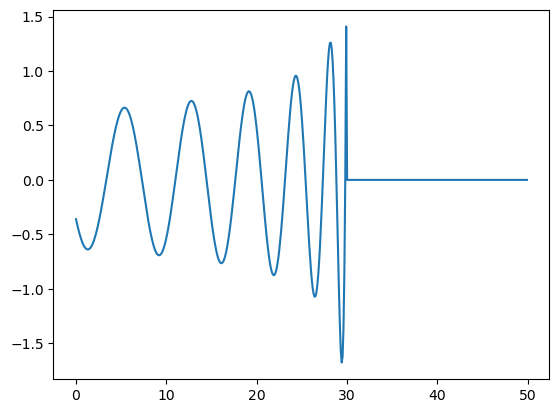

[0.5235987755982988]


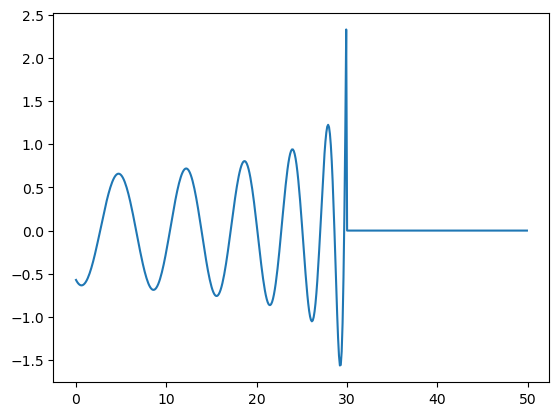

[1.0471975511965976]


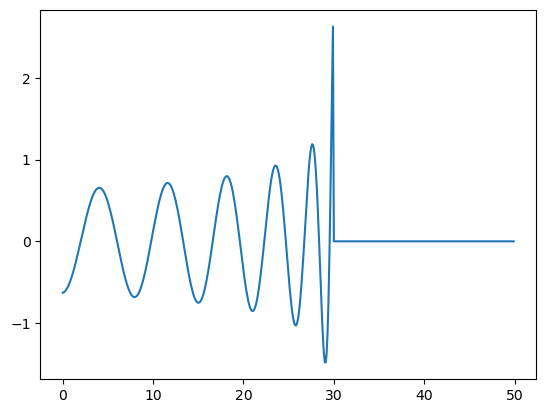

[1.5707963267948966]


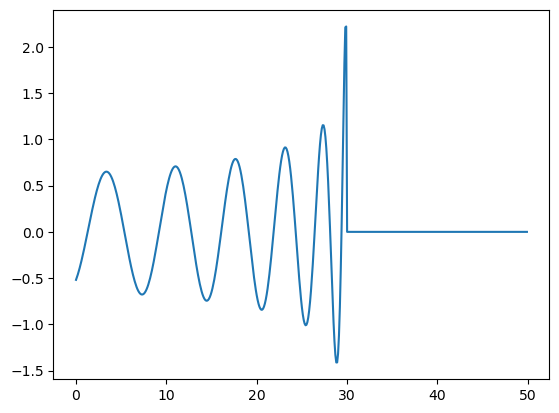

[2.0943951023931953]


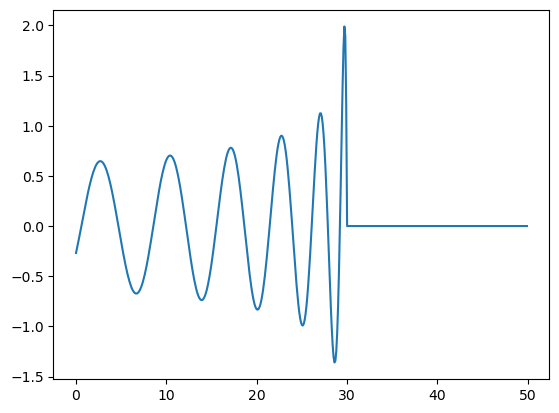

[2.6179938779914944]


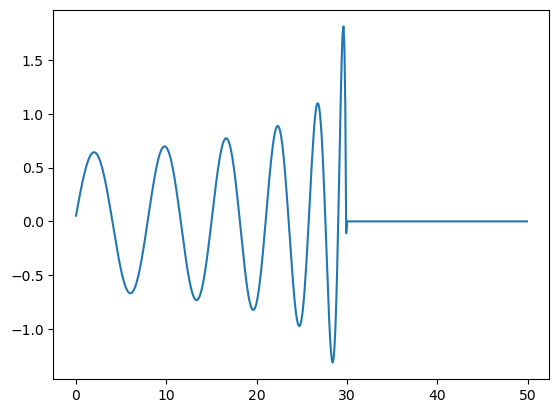

[3.141592653589793]


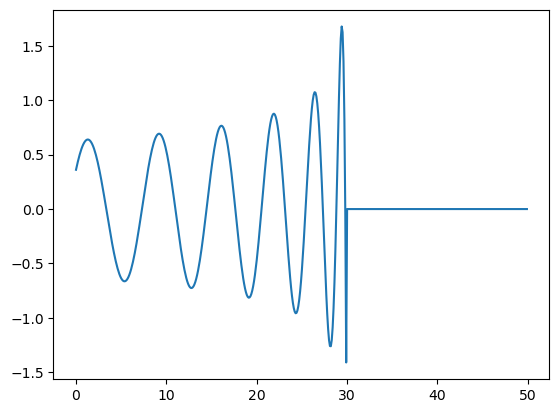

[3.665191429188092]


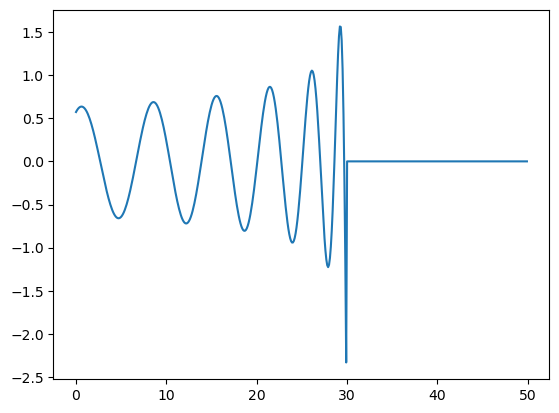

[4.1887902047863905]


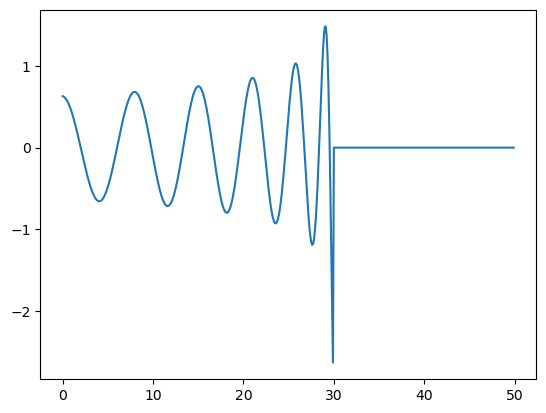

[4.71238898038469]


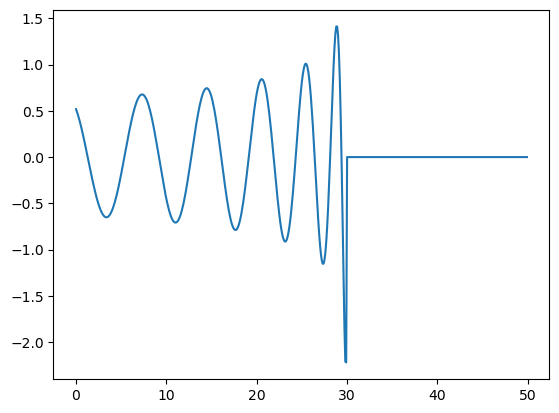

[5.235987755982989]


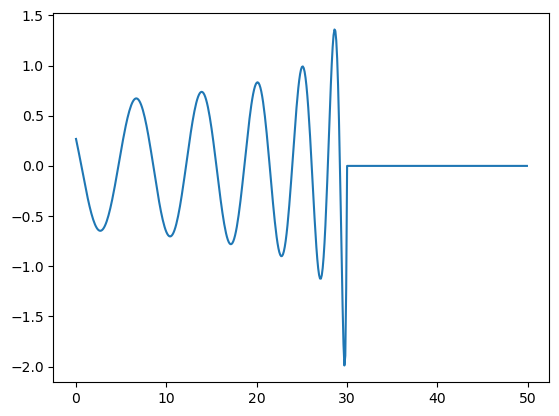

[5.759586531581287]


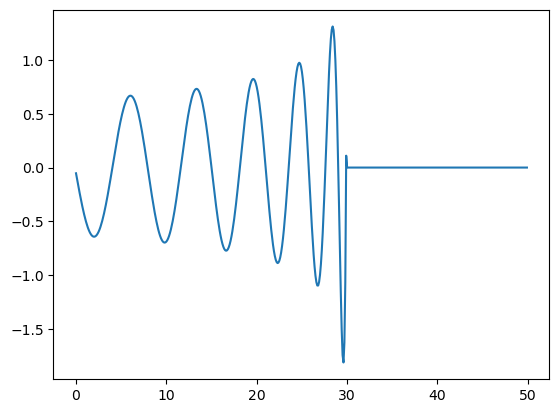

[6.283185307179586]


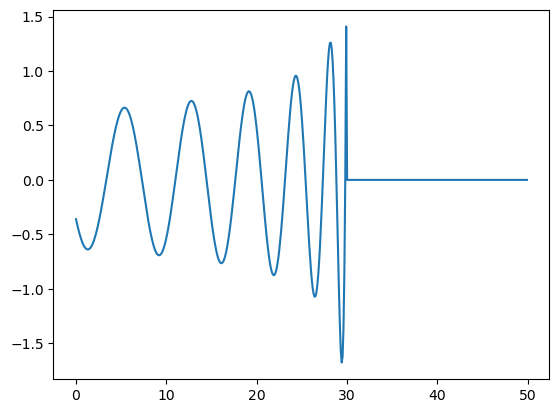

In [8]:
for i in range (13):
    phi_c=i*np.pi/6
    print([phi_c])
    plt.plot(t,strain(x,tc,phi_c))
    plt.show()

    

Prior for $\phi_c$ is uniform for values $(0,2\pi)$ \
Priot for chirp mass is uniform for values $(1,100)$


Our model can be reduced to $$h(t)\sim (t_c-t)^{-\frac{1}{4}}cos(-39.11x^{-\frac{5}{8}}(t_c-t)^{\frac{5}{8}}+\phi_c)$$

In [9]:
#random value for tc
def templ_ran(phi_c,x,t):
    tc=np.random.choice(t)
    resul=np.nan_to_num((tc-t)**(-1/4)*np.cos(phi_c-39.11*x**(-5/8)*(tc-t)**(5/8)))
    resul[abs(resul)>10**(4)]=0
    return resul
    

In [10]:
#give value for tc
def templ(phi_c,x,t,tc):
    resul=np.nan_to_num((tc-t)**(-1/4)*np.cos(phi_c-39.11*x**(-5/8)*(tc-t)**(5/8)))
    resul[abs(resul)>10**(4)]=0
    return resul
    

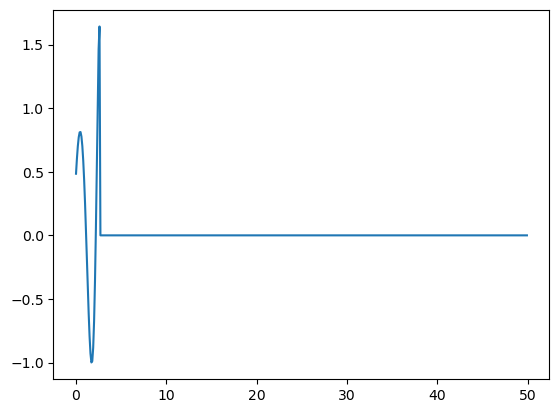

In [11]:
plt.plot(t,templ_ran(1.5,30,t))
#plt.xlim(0,50)

# Matched Filtering

Generate a signal and add random noise

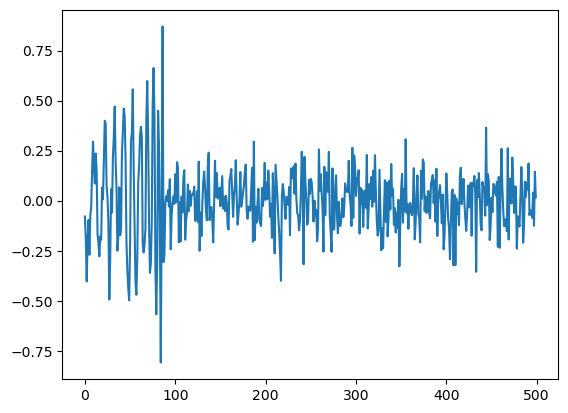

In [12]:
time=np.arange(0,500,1)
test=templ_ran(2.3,35,time)+np.random.normal(0,.12,len(time))
plt.plot(time,test)
plt.show()


We then want to find the time of merger

In [13]:
tsn=[]
for i in range(len(time)):
            tc=time[i]
            filt=templ(2.3,35,time,tc)
            val=(np.dot(filt,test))**2
            tsn.append(np.amax(val))

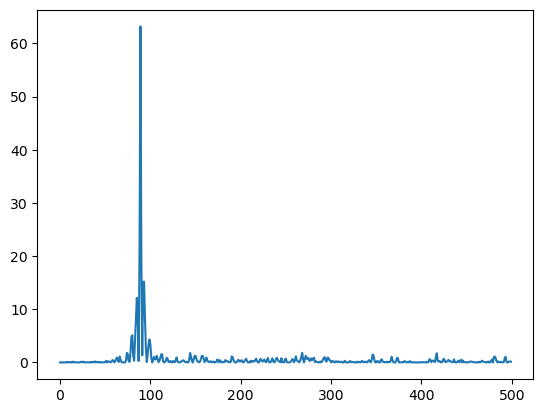

Time of merger is at: 89


In [14]:
plt.plot(time,tsn)
plt.show()
print('Time of merger is at:',time[np.where(tsn==np.amax(tsn))[0][0]])

We then try to recover all the other values as well, although we know them, this is just to test that we can find them. We use a small sample of values for mass and $\phi_c$ in order to minimize the time we have to run. We just need a close estimation to be ready for the real strains. 

In [15]:
#setting up the samples
mas=np.arange(1,100,2)
phiran=np.arange(0,2*np.pi,0.65)
print('Mass sampling:',len(mas))
print('phi_c sampling',len(phiran))
print('The total loop will be for:',len(mas)*len(phiran)*len(time))

Mass sampling: 50
phi_c sampling 10
The total loop will be for: 250000


In [16]:
sn=[]
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            tc=time[k]
            filt=templ(j,i,time,tc)
            val=(np.dot(filt,test))**2
            sn.append(np.amax(val))
            
            

In [17]:
max_loc=np.where(sn==np.amax(sn))[0][0]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            count=count+1
            #print(count)
            if count==max_loc:
                break
        if count==max_loc:
            break
    if count==max_loc:
        break
mass_true=i
phi_c_true=j
time_true=time[k]
print ('mass:',mass_true)
print('phi_c:',phi_c_true)
print('time of merger:',time_true)
print(count,max_loc)

mass: 35
phi_c: 5.2
time of merger: 88
89089 89089


Now we will do some plotting. First plot is the S/N (t) for our best estimates for mass and $\phi_c$

In [18]:
tsn=[]
count=0
for i in mas:
    for j in phiran:
        for k in range(len(time)):
            if (i==mass_true) & (j==phi_c_true):
                tsn.append(sn[count])
            count=count+1

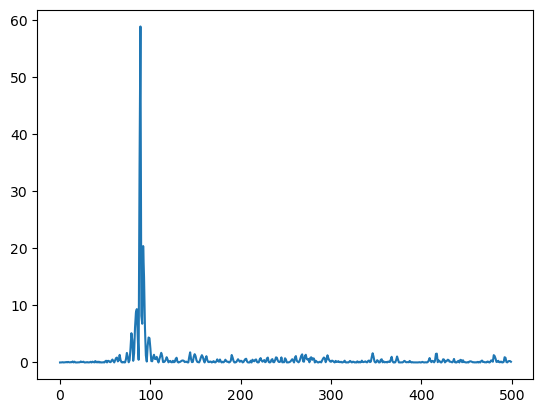

Time of merger is at: 89


In [19]:
plt.plot(time,tsn)
plt.show()
print('Time of merger is at:',time[np.where(tsn==np.amax(tsn))[0][0]])

Next is the probability plot for our parameters: Mass , $\phi_c$

In [20]:
mpsn=[]
count=0
for i in mas:
    psn=[]
    for j in phiran:
        ttsn=[]
        for k in range(len(time)):
            ttsn.append(sn[count])
            count=count+1
        psn.append(np.amax(ttsn))
    mpsn.append(psn)

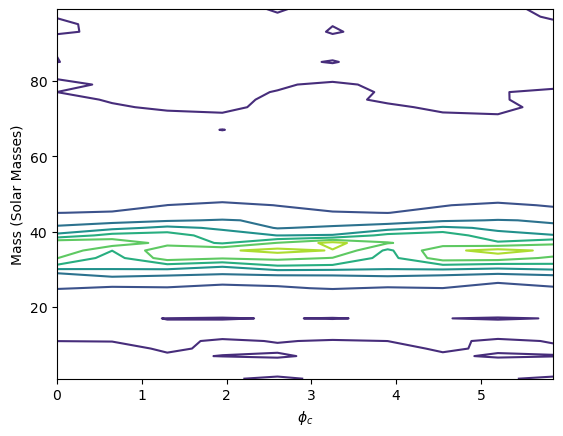

In [21]:
plt.contour(phiran,mas,mpsn)
#plt.ylim(30,40)
plt.ylabel('Mass (Solar Masses)')
plt.xlabel('$\phi_c$')
plt.show()